# Unit 5 - Financial Planning

In [58]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [59]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [60]:
# Set current amount of crypto assets
# YOUR CODE HERE!

my_btc = 1.2
my_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [61]:
# Fetch current BTC price
# YOUR CODE HERE!

response_data_btc = requests.get(btc_url)
data_btc = response_data_btc.json()
print(json.dumps(data_btc, indent=4))

# Fetch current ETH price
# YOUR CODE HERE!

response_data_eth = requests.get(eth_url)
data_eth = response_data_eth.json()
print(json.dumps(data_eth, indent=4))

# Compute current value of my crpto
# YOUR CODE HERE!
#VALUE IN CAD

btc_value = data_btc["data"]["1"]["quotes"]["CAD"]["price"]
my_btc_value = my_btc * btc_value
eth_value = data_eth["data"]["1027"]["quotes"]["CAD"]["price"]
my_eth_value = my_eth * eth_value

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18736968,
            "total_supply": 18736968,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 39387.0,
                    "volume_24h": 39066319726,
                    "market_cap": 736795562415,
                    "percentage_change_1h": 0.249197390893445,
                    "percentage_change_24h": -1.85323191259601,
                    "percentage_change_7d": 4.88295241292841,
                    "percent_change_1h": 0.249197390893445,
                    "percent_change_24h": -1.85323191259601,
                    "percent_change_7d": 4.88295241292841
                },
                "CAD": {
                    "price": 48532.6614,
                    "volume_24h": 48137519166.3772,
                    "

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [62]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [63]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
# YOUR CODE HERE!
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [66]:
# Format current date as ISO format
# YOUR CODE HERE!

today = pd.Timestamp("2021-06-15", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!


df_portfolio_today = alpaca.get_barset(
    tickers,
    timeframe,
    start = today,
    end = today
).df





# Preview DataFrame
# YOUR CODE HERE!

df_portfolio_today.head()

AGG                                       SPY  \
                            open    high     low    close   volume    open   
time                                                                         
2021-06-15 00:00:00-04:00  114.9  115.02  114.87  114.995  5842592  425.43   

                                                            
                             high     low  close    volume  
time                                                        
2021-06-15 00:00:00-04:00  425.46  423.54  424.5  42885806

In [67]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

# Fetch the closing prices of AGG and SPY

agg_close_price = float(df_portfolio_today["AGG"]["close"])
spy_close_price = float(df_portfolio_today["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.995
Current SPY closing price: $424.5


In [68]:
# Compute the current value of shares
# YOUR CODE HERE!
my_agg_value = my_agg * agg_close_price 
my_spy_value = my_spy * spy_close_price 

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $21225.00
The current value of your 200 AGG shares is $22999.00


### Savings Health Analysis

In [69]:
# Set monthly household income Consolidate financial assets data
# YOUR CODE HERE!
monthly_income = 12000
total_crypto = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {'amount':[total_crypto, total_shares_value]}


# Create savings DataFrame
# YOUR CODE HERE!

df_savings = pd.DataFrame(data, index =['crypto', 'shares']) 

# Display savings DataFrame
display(df_savings)

,amount
crypto,74230.037143
shares,44224.000000


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

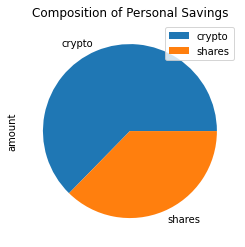

In [70]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [71]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!
total_savings = total_crypto + total_shares_value

# Validate saving health
# YOUR CODE HERE!

if emergency_fund < total_savings:
        print("Congratuations! You have enough money in your emergency fund.")
elif emergency_fund == total_savings:
        print("Congratulations! You have reach this financial goal")
else:
        print(f"You are {emergency_fund - total_savings} dollars away from reaching the goal")
        

Congratuations! You have enough money in your emergency fund.


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [72]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-06-15', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-06-15', tz='America/New_York').isoformat()

In [76]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!
tickers = ["AGG","SPY"]

df_portfolio = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end,
    limit = 1000
).df

# Display sample data
df_portfolio.head()

AGG                                       SPY  \
                             open    high     low   close   volume     open   
time                                                                          
2020-06-15 00:00:00-04:00  117.72  117.98  117.61  117.94  8120154  298.020   
2020-06-16 00:00:00-04:00  117.98  118.00  117.59  117.68  9274606  315.480   
2020-06-17 00:00:00-04:00  117.74  117.76  117.47  117.64  7241112  314.070   
2020-06-18 00:00:00-04:00  117.88  117.88  117.64  117.79  5689912  310.005   
2020-06-19 00:00:00-04:00  117.80  117.97  117.74  117.83  5269076  314.170   

                                                              
                             high     low   close     volume  
time                                                          
2020-06-15 00:00:00-04:00  308.28  296.74  307.03  123098924  
2020-06-16 00:00:00-04:00  315.64  307.67  312.93  121907854  
2020-06-17 00:00:00-04:00  314.39  310.86  311.56   74047487  
2020-06-18 00:00:00-04:00  312.30  309.51  311.74   64298819  
2020-06-19 00:00:00-04:00  314.38  306.53  308.56  111140318

In [80]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist = MCSimulation(portfolio_data = df_portfolio, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*30)

In [81]:
# Printing the simulation input data
# YOUR CODE HERE!
MC_even_dist.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2020-06-15 00:00:00-04:00  117.72  117.98  117.61  117.94  8120154   
2020-06-16 00:00:00-04:00  117.98  118.00  117.59  117.68  9274606   
2020-06-17 00:00:00-04:00  117.74  117.76  117.47  117.64  7241112   
2020-06-18 00:00:00-04:00  117.88  117.88  117.64  117.79  5689912   
2020-06-19 00:00:00-04:00  117.80  117.97  117.74  117.83  5269076   

                                            SPY                          \
                          daily_return     open    high     low   close   
time                                                                      
2020-06-15 00:00:00-04:00          NaN  298.020  308.28  296.74  307.03   
2020-06-16 00:00:00-04:00    -0.002205  315.480  315.64  307.67  312.93   
2020-06-17 00:00:00-04:00    -0.000340  314.070  314.39  310.86  311.56   
2020-06-18 00:00:00-04:00     0.001275  310.005  312.30  309.51  311.74   
2020-06-19 00:00:00-04:00     0.000340  314.170  314.38  306.53  308.56   

                                                   
                              volume daily_return  
time                                               
2020-06-15 00:00:00-04:00  123098924          NaN  
2020-06-16 00:00:00-04:00  121907854     0.019216  
2020-06-17 00:00:00-04:00   74047487    -0.004378  
2020-06-18 00:00:00-04:00   64298819     0.000578  
2020-06-19 00:00:00-04:00  111140318    -0.010201

In [82]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.014539,0.999886,0.996807,0.993830,0.995620,1.014168,1.002533,1.006307,1.008837,0.997231,...,0.998100,1.005149,0.994052,1.000224,1.005713,0.997319,1.008713,1.000098,1.001274,0.994195
2,1.016126,0.998941,1.006050,0.994800,1.005467,1.014548,1.004055,0.999869,1.005873,0.997656,...,0.993785,1.002950,0.990746,1.004411,1.007010,0.998916,0.998777,1.010056,0.997420,0.991399
3,1.013590,1.000989,1.003041,0.991362,1.013091,1.007513,1.009177,0.993280,1.011468,0.999101,...,0.995566,1.006911,0.989505,0.996828,1.003080,1.007213,0.989616,1.022362,0.997064,0.986599
4,1.010296,1.005535,1.001830,0.985027,1.027255,1.005288,1.009657,0.987778,1.006300,0.993563,...,0.982405,1.020515,0.989762,0.999594,0.996128,1.006839,0.997951,1.025507,1.012645,0.979210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,261.747155,250.176659,347.924216,338.064056,106.073299,686.579553,500.028499,1073.094610,172.860311,331.535539,...,509.833517,557.662598,236.971995,128.924311,350.279362,202.530746,411.007899,180.589293,476.136573,652.340644
7557,264.468235,248.793609,347.486383,339.652084,105.322208,685.024628,500.582448,1062.815050,175.280720,332.611608,...,515.217672,558.446035,236.233759,128.072522,347.606856,203.753638,409.995126,182.089735,480.036581,652.414406
7558,262.593752,250.846610,352.106443,341.351161,104.934405,687.404002,495.754479,1058.204610,177.363198,332.502520,...,516.786349,556.672574,235.062282,128.876806,346.149408,202.461181,409.934730,182.346250,477.725020,655.438485
7559,261.351354,249.914688,352.212942,341.704387,105.476055,682.771113,492.937549,1048.616035,175.495019,333.124627,...,512.528560,555.902324,233.532178,129.514280,347.122522,204.270063,413.896712,179.570728,475.219751,656.806569


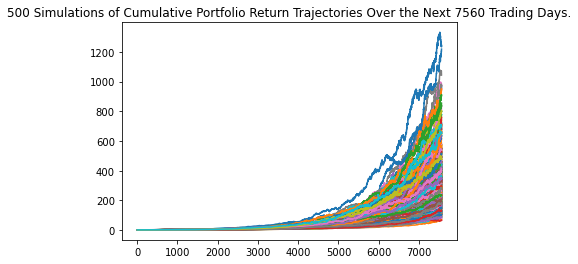

In [83]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist.plot_simulation()

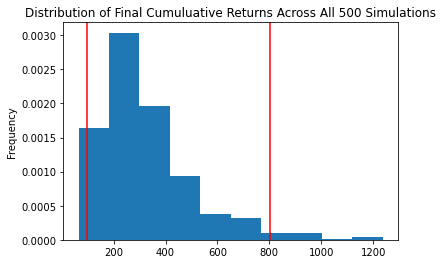

In [84]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [86]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl = MC_even_dist.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl)

count            500.000000
mean             324.879293
std              181.198184
min               64.932032
25%              205.939186
50%              280.624476
75%              394.877015
max             1237.006677
95% CI Lower      96.369921
95% CI Upper     801.258808
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [87]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $1927398.42 and $16025176.17


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [88]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!
ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $2891097.63 and $24037764.25


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [90]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_five = MCSimulation(portfolio_data = df_portfolio, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2020-06-15 00:00:00-04:00  117.72  117.98  117.61  117.94  8120154   
2020-06-16 00:00:00-04:00  117.98  118.00  117.59  117.68  9274606   
2020-06-17 00:00:00-04:00  117.74  117.76  117.47  117.64  7241112   
2020-06-18 00:00:00-04:00  117.88  117.88  117.64  117.79  5689912   
2020-06-19 00:00:00-04:00  117.80  117.97  117.74  117.83  5269076   

                                            SPY                          \
                          daily_return     open    high     low   close   
time                                                                      
2020-06-15 00:00:00-04:00          NaN  298.020  308.28  296.74  307.03   
2020-06-16 00:00:00-04:00    -0.002205  315.480  315.64  307.67  312.93   
2020-06-17 00:00:00-04:00    -0.000340  314.070  314.39  310.86  311.56   
2020-06-18 00:00:00-04:00     0.001275  310.005  312.30  309.51  311.74   
2020-06-19 00:00:00-04:00     0.000340  314.170  314.38  306.53  308.56   

                                                   
                              volume daily_return  
time                                               
2020-06-15 00:00:00-04:00  123098924          NaN  
2020-06-16 00:00:00-04:00  121907854     0.019216  
2020-06-17 00:00:00-04:00   74047487    -0.004378  
2020-06-18 00:00:00-04:00   64298819     0.000578  
2020-06-19 00:00:00-04:00  111140318    -0.010201

In [91]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!
MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.004931,1.011968,1.003867,1.007631,1.004203,0.993399,0.997675,1.005083,1.005956,0.989843,...,1.008174,1.006334,1.009837,1.009922,0.995526,1.000518,1.001644,1.009316,1.001324,0.997047
2,1.008515,1.010606,1.010118,1.016472,1.015346,0.994724,0.998676,1.011112,0.999858,0.984760,...,1.007394,1.009570,1.014964,1.012640,0.989728,0.998765,1.013512,1.010117,0.993994,1.003289
3,1.016049,1.009153,1.017117,1.020999,1.010713,0.981610,0.998452,1.013786,1.003341,0.989819,...,0.997059,1.009829,1.014080,1.018251,0.990093,1.001009,1.008408,1.003300,0.994394,0.995500
4,1.019151,1.014322,1.018869,1.028179,1.017593,0.985066,0.992132,1.000198,1.005892,0.982232,...,0.998050,1.018470,1.013063,1.026304,0.993433,1.002489,1.006704,1.005649,0.992839,1.004371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.665826,3.489052,3.172248,2.589223,2.594853,2.720973,2.360293,2.560120,2.616323,2.654289,...,3.509884,3.126700,2.798011,2.772937,3.282487,2.481593,1.901184,2.383082,2.858149,3.093742
1257,2.670678,3.479671,3.148142,2.593019,2.614477,2.723359,2.352267,2.545363,2.646155,2.626937,...,3.522964,3.101463,2.798420,2.785990,3.269139,2.497075,1.903586,2.374722,2.865860,3.078514
1258,2.650652,3.461108,3.174033,2.589217,2.617159,2.756398,2.374623,2.531697,2.661465,2.607955,...,3.524238,3.086431,2.814269,2.810418,3.277903,2.508655,1.895740,2.360827,2.876100,3.050057
1259,2.658427,3.448672,3.160286,2.595010,2.600833,2.755265,2.359642,2.525286,2.672420,2.618854,...,3.484409,3.078396,2.827551,2.814837,3.286232,2.526275,1.902938,2.368010,2.888814,3.069081


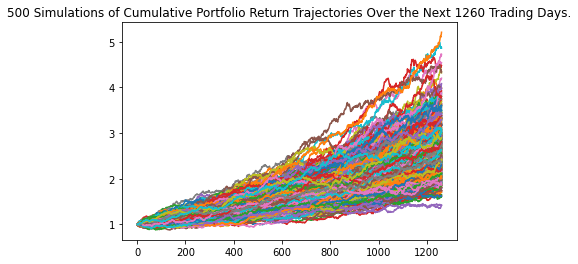

In [92]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_five = MC_even_dist_five.plot_simulation()

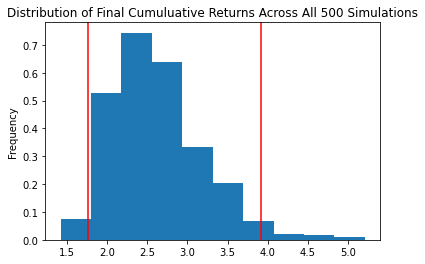

In [93]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!
dist_plot_five = MC_even_dist_five.plot_distribution()

In [96]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_five)

count           500.000000
mean              2.618718
std               0.571477
min               1.419199
25%               2.213966
50%               2.541224
75%               2.929176
max               5.210556
95% CI Lower      1.764745
95% CI Upper      3.911161
Name: 1260, dtype: float64


In [97]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $105884.72 and $234669.65


### Ten Years Retirement Option

In [99]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_ten = MCSimulation(portfolio_data = df_portfolio, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*10)
MC_even_dist_ten.portfolio_data.head()

AGG                                   \
                             open    high     low   close   volume   
time                                                                 
2020-06-15 00:00:00-04:00  117.72  117.98  117.61  117.94  8120154   
2020-06-16 00:00:00-04:00  117.98  118.00  117.59  117.68  9274606   
2020-06-17 00:00:00-04:00  117.74  117.76  117.47  117.64  7241112   
2020-06-18 00:00:00-04:00  117.88  117.88  117.64  117.79  5689912   
2020-06-19 00:00:00-04:00  117.80  117.97  117.74  117.83  5269076   

                                            SPY                          \
                          daily_return     open    high     low   close   
time                                                                      
2020-06-15 00:00:00-04:00          NaN  298.020  308.28  296.74  307.03   
2020-06-16 00:00:00-04:00    -0.002205  315.480  315.64  307.67  312.93   
2020-06-17 00:00:00-04:00    -0.000340  314.070  314.39  310.86  311.56   
2020-06-18 00:00:00-04:00     0.001275  310.005  312.30  309.51  311.74   
2020-06-19 00:00:00-04:00     0.000340  314.170  314.38  306.53  308.56   

                                                   
                              volume daily_return  
time                                               
2020-06-15 00:00:00-04:00  123098924          NaN  
2020-06-16 00:00:00-04:00  121907854     0.019216  
2020-06-17 00:00:00-04:00   74047487    -0.004378  
2020-06-18 00:00:00-04:00   64298819     0.000578  
2020-06-19 00:00:00-04:00  111140318    -0.010201

In [100]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.000544,0.994010,1.008277,1.000467,0.997815,0.993790,1.004556,0.994881,0.989898,0.994633,...,1.013116,0.997040,1.002984,0.992112,0.993835,0.996152,0.993617,1.010227,1.002533,1.009458
2,0.998911,0.991888,1.014852,0.998964,1.002132,0.993633,1.000197,1.003176,0.985706,0.995138,...,1.015497,0.997093,1.015779,0.998473,0.999646,0.985005,0.977292,1.020331,0.997573,1.013940
3,0.999947,0.988343,1.010865,0.992205,0.998135,0.996544,0.996350,1.005801,0.983719,1.004521,...,1.014556,0.991030,1.018043,0.999984,0.998408,0.980475,0.979063,1.035510,0.991385,1.013861
4,1.001162,0.992433,1.008669,0.986209,1.009648,0.997914,0.995746,1.015039,0.978762,1.017878,...,1.007810,0.987799,1.024097,1.004090,0.985593,0.979816,0.982291,1.038073,0.993287,1.007752
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,6.733258,7.303291,7.237965,5.143805,8.060753,6.749773,7.645684,8.654932,4.620176,5.972626,...,7.266920,5.618168,8.132999,8.987004,4.804333,6.168715,8.513657,9.899179,10.468510,9.865965
2517,6.754116,7.310380,7.255039,5.108959,8.070823,6.735470,7.660111,8.613592,4.627779,6.025673,...,7.246203,5.606167,8.136022,9.068976,4.792071,6.123853,8.545822,9.968724,10.405760,9.847938
2518,6.810796,7.314606,7.256095,5.096260,8.124678,6.884440,7.643718,8.633469,4.671440,6.042765,...,7.231879,5.598444,8.116951,9.063774,4.725151,6.206128,8.480321,9.973118,10.420322,9.984841
2519,6.813927,7.397226,7.288221,5.062448,8.134914,7.010736,7.553690,8.662262,4.662064,6.041604,...,7.140332,5.564487,8.043544,9.040260,4.726586,6.230111,8.487566,10.003667,10.481276,10.006403


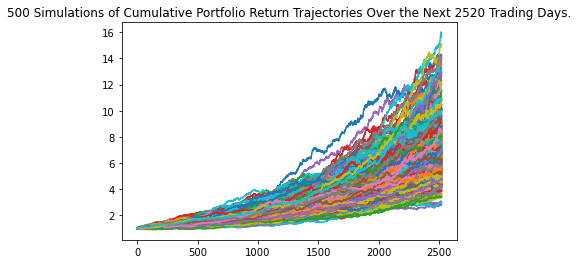

In [101]:
# Plot simulation outcomes
# YOUR CODE HERE!
line_plot_ten = MC_even_dist_ten.plot_simulation()

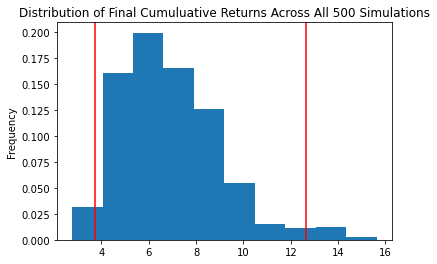

In [102]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [103]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!
even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!
print(even_tbl_ten)

count           500.000000
mean              6.896647
std               2.144621
min               2.764631
25%               5.356412
50%               6.616400
75%               8.118057
max              15.621813
95% CI Lower      3.724895
95% CI Upper     12.648804
Name: 2520, dtype: float64


In [104]:
# Set initial investment
# YOUR CODE HERE!
initial_investment_ten = 60000
# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!
ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)
# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $223493.7 and $758928.26
